In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

#Measured Data
HL = 177.9
HB = 86.6

In [40]:
#creation of coefficient matrices
#B:coefficient for segment length from hand span
B = np.array([[0.118,0.463,0.446,0.421,0.414],
              [0.251,0.245,0.266,0.244,0.204],
              [0.196,0.143,0.170,0.165,0.117],
              [0.158,0.097,0.108,0.107,0.093]])
#X:Coeficients for first joint x dimension
X = np.array([0.073,0.447,0.446,0.409,0.368])*HL
#Z:Coeficients for first joint z dimension
Z = np.array([-.196,-.251,0.000,0.206,0.402])*HB
#theta: Angles for first joint from the x axis
theta = np.arctan(Z/X)
#H: Coefficients for the ellipsoidal breadth
H = np.array([[np.nan,0.250,0.250,0.250,0.250],
              [ 0.150,0.104,0.101,0.097,0.092],
              [ 0.108,0.103,0.100,0.093,0.087],
              [ 0.113,0.093,0.094,0.091,0.084]])
#H: Coefficients for the ellipsoidal depth
K = np.array([[np.nan,0.200,0.183,0.173,0.164],
              [0.147,0.106,0.114,0.111,0.099],
              [0.107,0.092,0.095,0.089,0.086],
              [0.091,0.078,0.082,0.079,0.072]])

#Calculation of Model geometry Values
L_s = B * HL #Segment Lengths
c = H * HB #z direction constant
b = K * HB #y direction constant
l = 0.2 * b #y direction offset
a = 1.1 * L_s * 0.5 #x direction constant

#Coefficients for knuckle bredth
N = np.array([[np.nan,0.244,0.233,0.205,0.209],
              [0.245,0.215,0.217,0.204,0.184],
              [0.234,0.198,0.196,0.184,0.172]])
#Coefficients for knuckle depth
M = np.array([[0.292,0.239,0.269,0.268,0.230],
              [0.236,0.198,0.199,0.210,0.187],
              [0.204,0.166,0.169,0.159,0.144]])

e = N*HB #knuckle z dimension
d = M*HB #knuckle y dimension
l_k = 0.2*d #y dimension offset

"""
The equation for the ellipsoidal shapes are
(x-L_s/2)^2/a^2 + (y+l)^2/b^2 + z^2/c^2 = 1
"""

#Calculate Segment coordinates
x = np.empty([5,5])
z = np.empty([5,5])
for i in range(0,5):
    x_i = np.array([0,
                    L_s[0,i]*np.cos(theta[i]),
                    (L_s[1,i]+L_s[0,i])*np.cos(theta[i]),
                    (L_s[2,1]+L_s[1,i]+L_s[0,i])*np.cos(theta[i]),
                    (L_s[3,1]+L_s[2,1]+L_s[1,i]+L_s[0,i])*np.cos(theta[i])])
    z_i = np.array([0,
                    L_s[0,i]*np.sin(theta[i]),
                    (L_s[1,i]+L_s[0,i])*np.sin(theta[i]),
                    (L_s[2,1]+L_s[1,i]+L_s[0,i])*np.sin(theta[i]),
                    (L_s[3,1]+L_s[2,1]+L_s[1,i]+L_s[0,i])*np.sin(theta[i])])
    x[:,i] = x_i
    z[:,i] = z_i


#Export all Constants
segment_family = np.array([a.flatten('F'),b.flatten('F'),c.flatten('F'),l.flatten('F'),L_s.flatten('F'),])
segment_family[1:4,0] = np.array([1.2,1,0.5])
np.savetxt('segment_family.csv', segment_family.T ,delimiter = ',')
theta = theta*180/np.pi
np.savetxt('theta.csv',theta, delimiter = ',')
knuckle_family = np.array([d.flatten('F'),e.flatten('F'),l_k.flatten('F')])
np.savetxt('knuckle_family.csv',knuckle_family.T,delimiter= ',')

(-100.0, 100.0)

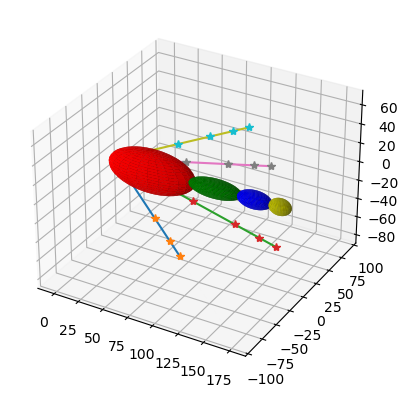

In [41]:
fig=plt.figure()
ax = plt.axes(projection='3d')
for i in range(0,5):
    ax.plot3D(x[:,i],np.zeros(5),z[:,i])
    ax.plot3D(x[:,i],np.zeros(5),z[:,i],'*')

"""
The equation for the ellipsoidal shapes are
(x-L_s/2)^2/a^2 + (y+l)^2/b^2 + z^2/c^2 = 1
"""

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

L = np.array([L_s[0,2]/2, L_s[0,2]+L_s[1,2]/2, L_s[0,2]+L_s[1,2]+L_s[2,2]/2,L_s[0,2]+L_s[1,2]+L_s[2,2]+L_s[3,2]/2])
colors = 'rgby'

for i in range(0,4):
    # Cartesian coordinates that correspond to the spherical angles:
    x = L[i] + a[i,2] * np.outer(np.cos(u), np.sin(v))
    y = b[i,2] * np.outer(np.sin(u), np.sin(v)) - l[i,2]
    z = c[i,2] * np.outer(np.ones_like(u), np.cos(v))

    point_grid = np.array([np.ndarray.flatten(x),np.ndarray.flatten(y),np.ndarray.flatten(z)])
    np.savetxt('ellipsoid.pts', point_grid.T ,delimiter = ',')

    # Plot:
    ax.plot_surface(x, y, z,  rstride=4, cstride=4, color=colors[i])

ax.set_ylim((-100,100))